In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import os

In [5]:
datasource = os.path.abspath('..\Data\service5.csv')
data = pd.read_csv(datasource , delimiter=";")
data.head(10)

,text,label
0,my request is very urgent!!,urgent
1,my request is very important!!,urgent
2,my request is really urgent!!,urgent
3,my request is really impotant!!,urgent
4,you must complete this Mission now !!,urgent
5,you must complete your Mission now !!,urgent
6,you must complete this Mission right now !!,urgent
7,you must complete this Mission instantly !!,urgent
8,you must complete this Mission fast !!,urgent
9,you must complete this Mission very fast !!,urgent


Text(0.5,1,'Number of urgent and noturgent messages')

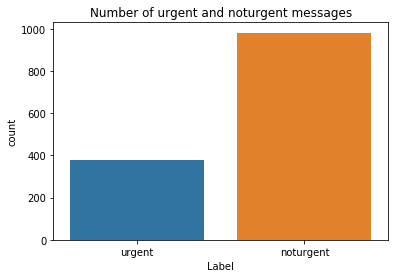

In [3]:
sns.countplot(data.label)
plt.xlabel('Label')
plt.title('Number of urgent and noturgent messages')

In [4]:
X = data.text
Y = data.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
print(Y)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
print(Y_train)
print(X_train)

[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]
1080                              WARNING - DO NOT BUY!!.
123            You must give me your answer immediatly !!
530                     Rip off---- Over charge shipping.
753                                     It's AGGRAVATING!
431                              Great sound and service.
784     It feels poorly constructed, the menus are dif...
1335    my laptop is broken and i have work to do can ...
472       I gave it 5 stars because of the sound quality.
1292    i need to buy the ticket fast before it solde ...
605                                          Works great.
901                           lightweight and works well.
1048    I have read other's reviews here but I haven't...
506            I received it quickly and it works great!!
1050                              Comfortable in my hand.
36                     i need these papers very quickly!!
1224       i need some papers from the agency instantly!!
429                             What

In [6]:
import os
from keras.preprocessing.sequence import pad_sequences
max_words = 2000
max_len = 25
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
print(sequences)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
print(sequences_matrix)
print('word_index : ',tok.word_index)

[[822, 49, 19, 109], [10, 22, 74, 29, 21, 194, 97], [823, 137, 195, 75, 350], [56, 824], [23, 40, 4, 61], [5, 296, 436, 825, 1, 826, 44, 273, 3, 827, 4, 1, 274, 44, 36, 828, 25, 5, 7, 273, 3, 568, 163], [8, 569, 7, 351, 4, 2, 20, 27, 3, 49, 70, 10, 118, 5, 16, 178, 437], [2, 829, 5, 196, 570, 119, 17, 1, 40, 34], [2, 15, 3, 109, 1, 571, 32, 164, 5, 830, 81], [41, 23], [572, 4, 41, 52], [2, 20, 831, 832, 573, 243, 46, 2, 833, 39, 87, 110, 18, 5], [2, 275, 5, 179, 4, 5, 41, 23], [120, 16, 8, 574], [2, 15, 33, 128, 13, 179], [2, 15, 244, 128, 58, 1, 438, 59], [121, 9, 245, 138, 17, 62], [8, 246, 91, 45, 243, 16, 178, 352], [2, 15, 3, 67, 3, 1, 105, 59], [180, 575, 5, 81], [92, 576, 577, 14, 276, 82, 27], [10, 20, 3, 111, 6, 27, 97], [1, 98, 13, 439, 150, 24, 99, 24, 78, 834], [2, 55, 8, 100, 181], [35, 7, 247, 277, 5, 88, 19, 20, 151, 353, 835, 3, 75, 1, 53, 836, 2, 24, 837, 3, 47, 5, 18], [120, 197, 10, 15, 21, 37, 3, 45, 120, 14, 79, 440, 101, 352, 79, 9, 62, 68, 19, 14, 101, 838, 437],

[[   0    0    0 ...   49   19  109]
 [   0    0    0 ...   21  194   97]
 [   0    0    0 ...  195   75  350]
 ...
 [   0    0    0 ...  205   21 1805]
 [   0    0    0 ...   62   96   51]
 [   0    0    0 ...  252  144    5]]
word_index :  {'the': 1, 'i': 2, 'to': 3, 'and': 4, 'it': 5, 'this': 6, 'is': 7, 'my': 8, 'a': 9, 'you': 10, 'phone': 11, 'now': 12, 'very': 13, 'for': 14, 'need': 15, 'in': 16, 'of': 17, 'with': 18, 'not': 19, 'have': 20, 'your': 21, 'must': 22, 'great': 23, 'was': 24, 'that': 25, 'on': 26, 'work': 27, 'good': 28, 'me': 29, 'right': 30, 'as': 31, 'fast': 32, 'these': 33, 'quality': 34, 'product': 35, 'so': 36, 'headset': 37, 'call': 38, 'had': 39, 'sound': 40, 'works': 41, 'battery': 42, 'one': 43, 'are': 44, 'be': 45, 'but': 46, 'use': 47, 'help': 48, 'do': 49, 'all': 50, 'up': 51, 'well': 52, '2': 53, 'car': 54, 'want': 55, "it's": 56, 'ear': 57, 'from': 58, 'instantly': 59, 'get': 60, 'service': 61, 'time': 62, 'really': 63, 'than': 64, 'would': 65, 'has': 6

In [7]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [8]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 25)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 25, 50)            100000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [9]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 923 samples, validate on 231 samples
Epoch 1/10
923/923 [==============================] - 1s 1ms/step - loss: 0.6457 - acc: 0.6934 - val_loss: 0.5678 - val_acc: 0.7100
Epoch 2/10
923/923 [==============================] - 0s 226us/step - loss: 0.5081 - acc: 0.7194 - val_loss: 0.5670 - val_acc: 0.7100
Epoch 3/10
923/923 [==============================] - 0s 244us/step - loss: 0.3936 - acc: 0.8104 - val_loss: 0.3153 - val_acc: 0.8139
Epoch 4/10
923/923 [==============================] - 0s 248us/step - loss: 0.2202 - acc: 0.9415 - val_loss: 0.1944 - val_acc: 0.9437
Epoch 5/10
923/923 [==============================] - 0s 241us/step - loss: 0.1098 - acc: 0.9751 - val_loss: 0.1593 - val_acc: 0.9567
Epoch 6/10
923/923 [==============================] - 0s 253us/step - loss: 0.0572 - acc: 0.9978 - val_loss: 0.1177 - val_acc: 0.9697
Epoch 7/10
923/923 [==============================] - 0s 249us/step - loss: 0.0462 - acc: 0.9881 - val_loss: 0.1229 - val_acc: 0.9697


In [10]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
pred = model.predict(test_sequences_matrix)

In [11]:
accr = model.evaluate(test_sequences_matrix,Y_test)

204/204 [==============================] - 0s 98us/step


In [12]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.041
  Accuracy: 0.990


In [13]:
text = np.array(['i need my phone now '])
sequences = tok.texts_to_sequences(text)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
prediction = model.predict(sequences_matrix)
predict=np.argmax(prediction,axis=1)
print(sequences_matrix)
print(sequences)
print(prediction)
print(predict[0])

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2 15  8 11
  12]]
[[2, 15, 8, 11, 12]]
[[0.94355255]]
0
